# DATA_EXPLORATION

In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [2]:
#importing local modules
sys.path.insert(0,'../Scripts/')
from cleaner import DataCleaner
from data_information import DataInfo
from Data_logger import CreateLogger
from data_manipulation import DataManipulator
from Graphs import draw
from Results import result_picker



### Loading Data

In [3]:
#loading train data
res=result_picker()

train_df = pd.read_csv('../data/train.csv')
train_data_info = DataInfo(train_df, deep=True)
train_data_info.get_information()

DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
#Loading the test data
test_df = pd.read_csv('../data/test.csv')
test_data_info = DataInfo(test_df, deep=True)
test_data_info.get_information()

DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [5]:
#missing values for the train data
missing_train = train_data_info.get_column_based_missing_percentage()
res.add_data('missing_data',missing_train)

#missing values for the test data
missing_test = test_data_info.get_column_based_missing_percentage()
res.add_data('missing_data',missing_test)

missing_train




,total_missing_values,missing_percentage
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Sales,0,0.0 %
Customers,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %
StateHoliday,0,0.0 %
SchoolHoliday,0,0.0 %


In [6]:
missing_test

,total_missing_values,missing_percentage
Id,0,0.0 %
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Open,11,0.03 %
Promo,0,0.0 %
StateHoliday,0,0.0 %
SchoolHoliday,0,0.0 %


#### Train and Test data has a compromizable (almost no) missing data

In [7]:
#Loading the store data
store_df = pd.read_csv('../data/store.csv')
store_data_info = DataInfo(store_df, deep=True)
store_data_info.get_information()

DataFrame Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
missing_store = store_data_info.get_column_based_missing_percentage()
res.add_data('missing_data',missing_store)

missing_store

,total_missing_values,missing_percentage
Store,0,0.0 %
StoreType,0,0.0 %
Assortment,0,0.0 %
CompetitionDistance,3,0.27 %
CompetitionOpenSinceMonth,354,31.75 %
CompetitionOpenSinceYear,354,31.75 %
Promo2,0,0.0 %
Promo2SinceWeek,544,48.79 %
Promo2SinceYear,544,48.79 %
PromoInterval,544,48.79 %


#### Promos2sinceweek, Promo2SinceYear, PromoInterval have almost missing data of 50%, which are irrelevant for decision making so will be omitted

In [9]:
train_df['StateHoliday'] = train_df['StateHoliday'].apply(lambda x: 0 if x == '0' else x)
test_df['StateHoliday'] = test_df['StateHoliday'].apply(lambda x: 0 if x == '0' else x)

In [10]:
#given the object type date so we have to change it to datatime for seasonality analysis
train_cleaner = DataCleaner(train_df)
test_cleaner = DataCleaner(test_df)

In [11]:
train_cleaner.change_column_to_date_type('Date')
test_cleaner.change_column_to_date_type('Date')

train_cleaner.df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [12]:
test_cleaner.df.dtypes

Id                        int64
Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Open                    float64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [13]:
train_cleaner.df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [14]:
#Combining train and store data using store id since it's found on both
combined_df = DataCleaner(train_df)
combined_df = combined_df.add_columns_from_another_df_using_column(store_df, 'Store', [
                                                               'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2'])

In [15]:
combined_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0


In [ ]:
combined_df.to_csv('../data/store_train_combined.csv')

# Task 1

### a) Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [16]:
from matplotlib.offsetbox import AnchoredText
train_percentage = train_df['Promo'].value_counts(0)
train_percentage =  train_percentage.values[1] / (train_percentage.values[0] + train_percentage.values[1])

test_percentage = test_df['Promo'].value_counts(0)
test_percentage = test_percentage.values[1] / (test_percentage.values[0] + test_percentage.values[1])

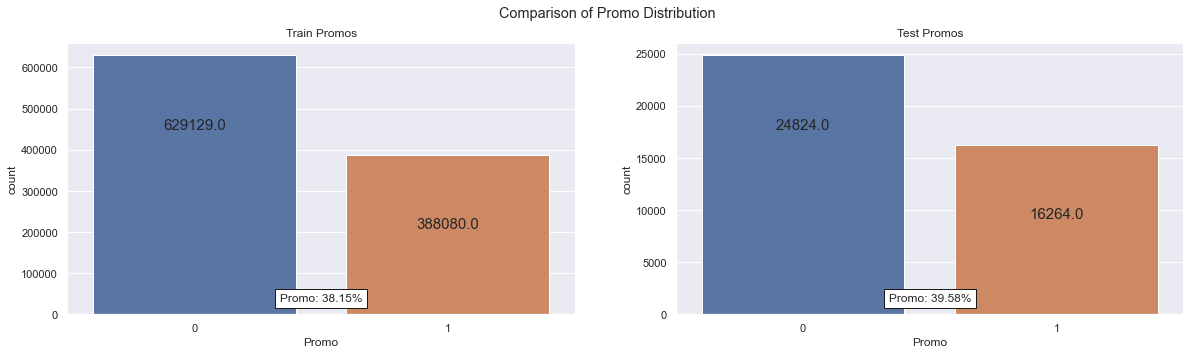

In [17]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle(f'Comparison of Promo Distribution')
sns.axes_style('darkgrid')
plot1 = sns.countplot(x="Promo", data=train_df, ax=axs[0])
plot1.set_title('Train Promos')
anc1 = AnchoredText("Promo: {:.2%}".format(train_percentage), loc="lower center", frameon=True)
axs[0].add_artist(anc1)
for p in plot1.patches:
    plot1.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=15,
                   xytext=(0, -70),
                   textcoords='offset points')

plot2 = sns.countplot(x="Promo", data=test_df, ax=axs[1])
plot2.set_title('Test Promos')
anc2 = AnchoredText("Promo: {:.2%}".format(
    test_percentage), loc="lower center", frameon=True)
axs[1].add_artist(anc2)
for p in plot2.patches:
    plot2.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=15,
                   xytext=(0, -70),
                   textcoords='offset points')

In [ ]:
plt.savefig('../data/comp_promo_dist.png')

In [18]:
train_data_cleaner = DataCleaner(train_df)
test_data_cleaner = DataCleaner(test_df)

In [19]:
train_data_cleaner.separate_date_column(date_column='Date')
test_data_cleaner.separate_date_column(date_column='Date')

In [20]:
train_data_cleaner.df.dtypes

Store             int64
DayOfWeek         int64
Year              int64
Month             int64
Day               int64
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

<AxesSubplot:xlabel='Year', ylabel='Promo'>

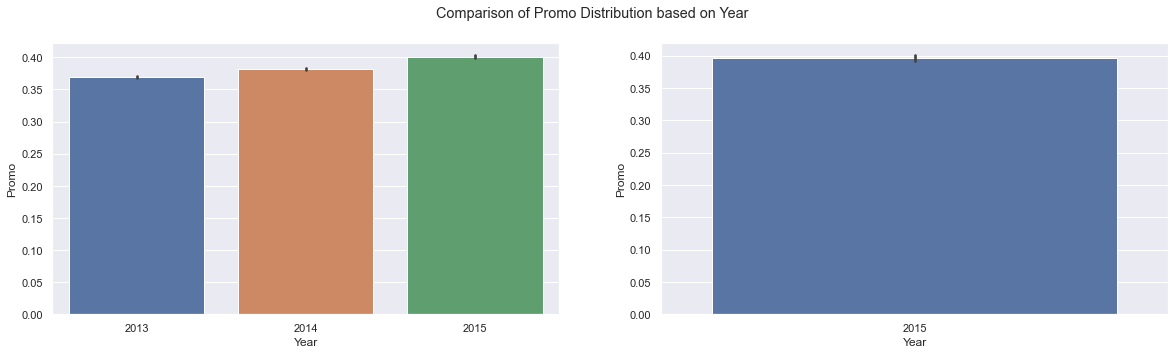

In [21]:
#Distribution based on Year
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle(f'Comparison of Promo Distribution based on Year')
sns.barplot('Year',"Promo", data=train_df,ax=axs[0])
sns.barplot('Year',"Promo", data=test_df,ax=axs[1])

In [52]:
plt.savefig('../data/year_based_dist.png')

<Figure size 432x288 with 0 Axes>

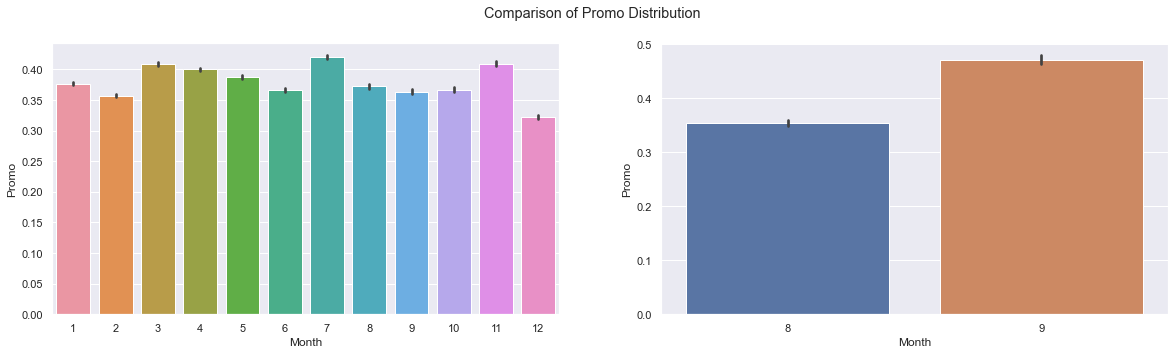

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle(f'Comparison of Promo Distribution')
sns.barplot('Month',"Promo", data=train_df,ax=axs[0])
sns.barplot('Month',"Promo", data=test_df,ax=axs[1])

plt.savefig('../data/Month_based_dist.png')

### b) Check & compare sales behavior before, during and after holidays

In [22]:
#considering a christmas week(7 days), Easter(15 days) and public holiday(1)

def affect_list(change_list, interval, duration, index):
    start_pt = int(index-duration/2) - interval
    try:
        for index in range(start_pt, start_pt + interval):
            change_list[index] = 'before'
        for index in range(start_pt + interval, start_pt + interval + duration):
            change_list[index] = 'during'
        for index in range(start_pt + interval + duration, start_pt + interval + duration + interval):
            change_list[index] = 'after'
    except:
        pass

    return change_list


state_holiday_list = train_df['StateHoliday'].values.tolist()
def modify_holiday_list(holiday_list:list) -> list:
    new_index = ["neither"] * len(holiday_list)
    for index , value in enumerate(holiday_list):
        if value == 'a': #public holiday
            affect_list(new_index, 3, 1, index)
        elif value == 'b': #Easter
            affect_list(new_index, 10, 15, index)
        elif value == 'c': # christmas
            affect_list(new_index, 5, 7, index)
        else:
            pass

    return new_index

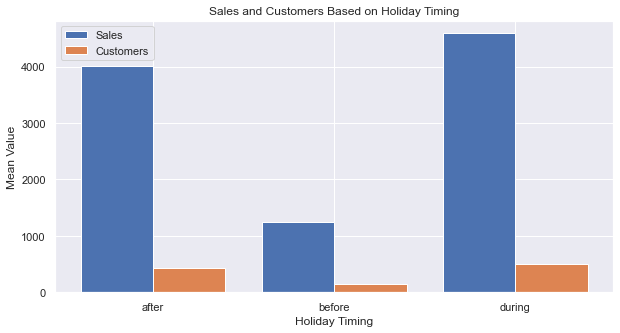

In [60]:
sales_timing_list = modify_holiday_list(state_holiday_list)
timing_added_df = train_df.loc[:,['Sales','Customers']]
timing_added_df['HolidayTiming'] = sales_timing_list
grouped_timing = timing_added_df.groupby('HolidayTiming').agg(
    {'Sales': 'mean', 'Customers': 'mean'})
grouped_timing = grouped_timing.iloc[:3, :]

plt.figure(figsize=(10,5))
X_axis = np.arange(len(grouped_timing.index))
plt.bar(X_axis - 0.2, grouped_timing['Sales'], 0.4, label='Sales')
plt.bar(X_axis + 0.2, grouped_timing['Customers'], 0.4, label='Customers')

plt.xticks(X_axis, grouped_timing.index)
plt.xlabel("Holiday Timing")
plt.ylabel("Mean Value")
plt.title("Sales and Customers Based on Holiday Timing")
plt.legend()

In [33]:
plt.savefig('../data/holiday_timing.png')

<Figure size 432x288 with 0 Axes>

### C) Find out any seasonal (Christmas, Easter etc) purchase behaviours

In [23]:
train_season = DataInfo(train_cleaner.df)
test_season = DataInfo(test_cleaner.df)

seasonal = train_season.get_grouped_by('StateHoliday').agg({'Sales':'mean', 'Customers':'mean'})
seasonal = seasonal.iloc[1:,:]
seasonal

,Sales,Customers
StateHoliday,,
a,290.735686,43.817670
b,214.311510,36.561883
c,168.733171,27.174390


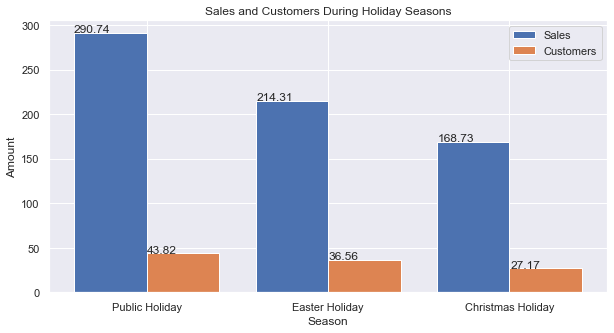

In [24]:
seasonal.index = ['Public Holiday','Easter Holiday','Christmas Holiday']
X_axis = np.arange(len(seasonal.index))
plt.figure(figsize=(10, 5))
plt1 = plt.bar(X_axis - 0.2, seasonal['Sales'], 0.4, label='Sales')
for p in plt1.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                * 1.005, p.get_height() * 1.005))
plt2 = plt.bar(X_axis + 0.2, seasonal['Customers'], 0.4, label='Customers')
for p in plt2.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                                       * 1.005, p.get_height() * 1.005))
                                       
plt.xticks(X_axis, seasonal.index)
plt.xlabel("Season")
plt.ylabel("Amount")
plt.title("Sales and Customers During Holiday Seasons")
plt.legend()


In [34]:
plt.savefig('../data/holiday_season.png')

<Figure size 432x288 with 0 Axes>

### d) What can you say about the correlation between sales and number of customers?

In [25]:
sales_nd_customer = train_df.loc[:,['Sales','Customers']]
sales_cutomer_corr = sales_nd_customer.corr()
sales_cutomer_corr

,Sales,Customers
Sales,1.000000,0.894711
Customers,0.894711,1.000000


<AxesSubplot:xlabel='Sales', ylabel='Customers'>

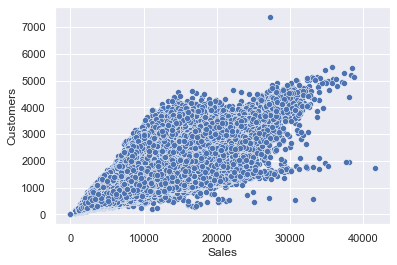

In [26]:
customer_sales_df = train_df[["Date", "Sales", "Customers"]]
sns.scatterplot(data=customer_sales_df, x='Sales', y='Customers')

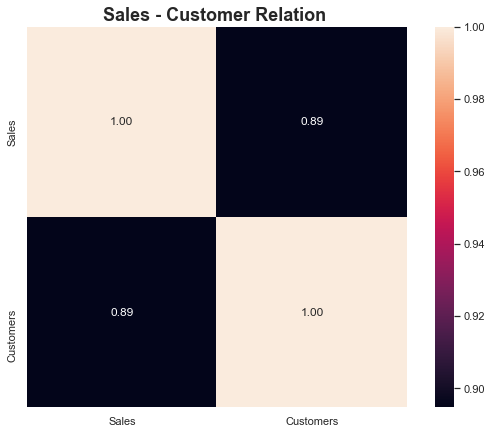

In [27]:
plt.figure(figsize=(10, 7))
sns.heatmap(sales_cutomer_corr, annot=True, square=True, fmt=".2f")
plt.title('Sales - Customer Relation ', size=18, fontweight='bold')

plt.savefig('../data/sales_cust_corr.png')

#### e) How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [28]:
sales_nd_promo = train_df.loc[:,['Sales','Promo']]
sales_promo_corr = sales_nd_promo.corr()
sales_promo_corr

,Sales,Promo
Sales,1.000000,0.452345
Promo,0.452345,1.000000


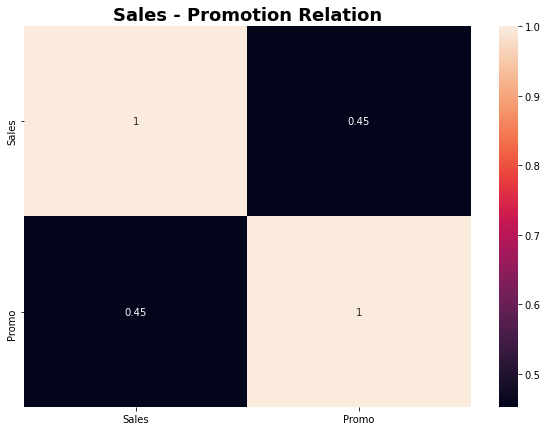

In [38]:
plt.figure(figsize=(10, 7))
sns.heatmap(sales_promo_corr, annot=True)
plt.title('Sales - Promotion Relation', size=18, fontweight='bold')

plt.savefig('../data/sales_promo_corr.png')

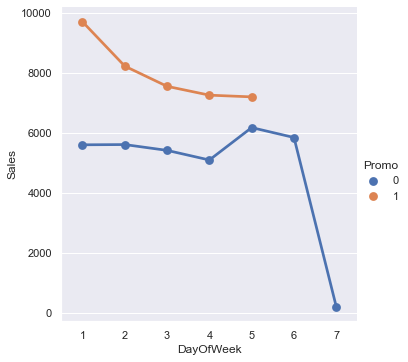

In [29]:
#Daily sales
sns.factorplot(data = train_df, x ="DayOfWeek", y = "Sales", hue='Promo' ,sharex=False)

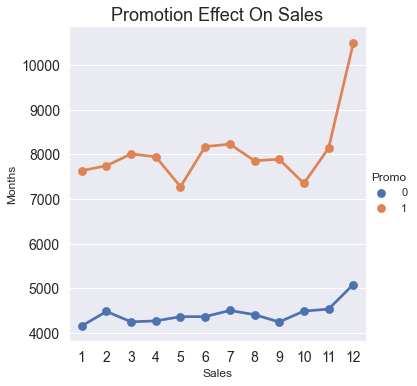

In [30]:
#Monthly sales
sns.factorplot(data = train_df, x ="Month", y = "Sales",
               hue = 'Promo')
plt.title("Promotion Effect On Sales", size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Sales", fontsize=12)
plt.ylabel(ylabel="Months", fontsize=12)
plt.show()

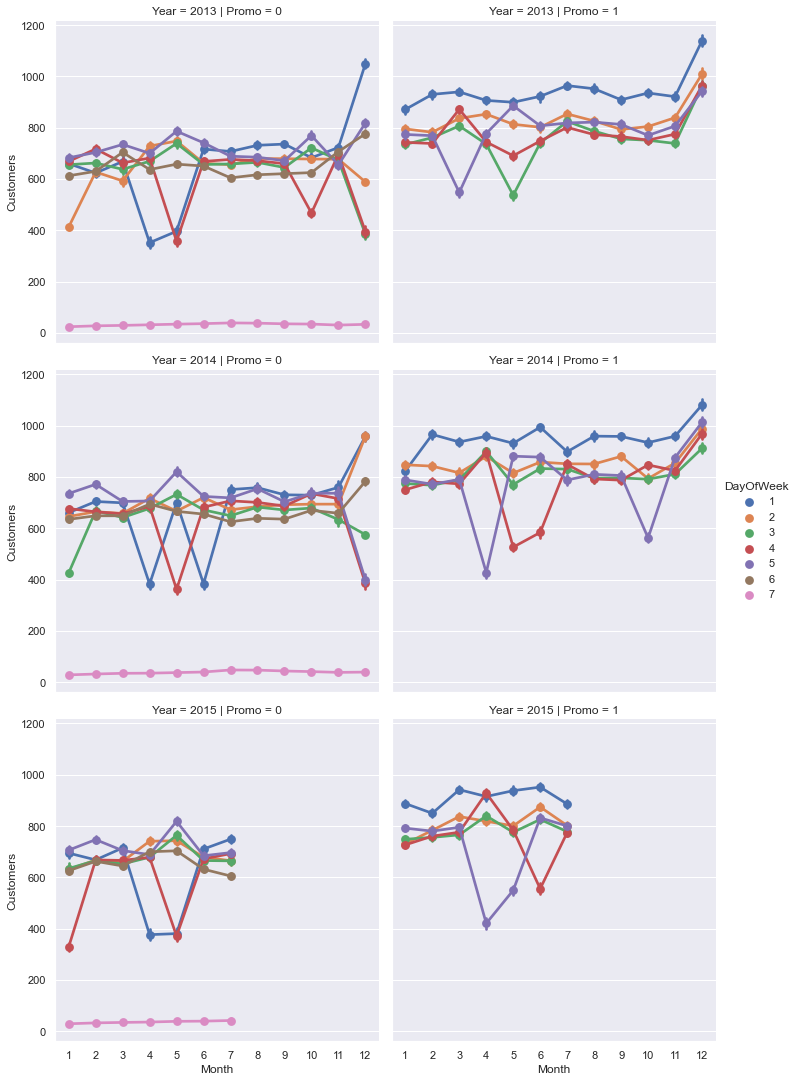

In [67]:
#Yearly sales
sns.catplot(data=train_df, x="Month", y="Customers",col='Promo',row="Year", hue='DayOfWeek', kind='point')

In [75]:
customer_nd_promo = train_df.loc[:, ['Customers', 'Promo']]
customer_promo_corr = customer_nd_promo.corr()
customer_promo_corr

,Customers,Promo
Customers,1.000000,0.316169
Promo,0.316169,1.000000


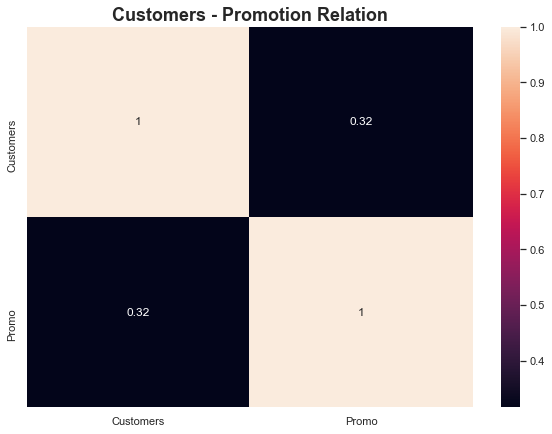

In [76]:
plt.figure(figsize=(10, 7))
sns.heatmap(customer_promo_corr, annot=True)
plt.title('Customers - Promotion Relation', size=18, fontweight='bold')

plt.savefig('../data/cust_promo_corr.png')

In [78]:
#how does it affect existing  customers
customer_promo_corr = train_df.loc[:,['Store','Customers','Promo','Sales']]
store_customer_difference = customer_promo_corr.groupby(['Store','Promo']).agg({'Customers':'mean','Sales':'mean'})
store_customer_difference

Customers         Sales
Store Promo                           
1     0       399.682131   3198.994845
      1       577.522222   5152.886111
2     0       366.876289   2855.058419
      1       678.702778   6172.816667
3     0       477.445017   3967.596220
...                  ...           ...
1113  1       754.250000   7320.086111
1114  0      2353.958763  14477.742268
      1      3165.383333  21601.497222
1115  0       297.800687   4082.221649
      1       457.122222   7073.266667

[2230 rows x 2 columns]

In [79]:
customer_value = store_customer_difference.Customers.values.tolist()
def get_average_increase_from_all_stores(grouped_cutomer_list:list) -> float:
    percentage_increase = []
    i = 0
    while(i < len(grouped_cutomer_list)):
        new_perc = ((grouped_cutomer_list[i+1] * 100) / grouped_cutomer_list[i]) - 100
        percentage_increase.append(new_perc)
        i += 2

    return percentage_increase,sum(percentage_increase) / len(percentage_increase)

increase_list, average_increase = get_average_increase_from_all_stores(customer_value)

In [81]:
#Average increase across all stores
print('The average customer increase across all stores due to promotion is by: {:.2%}'.format(average_increase/100))
res.add_data('averageincreaseacross', average_increase/100)

The average customer increase across all stores due to promotion is by: 62.18%


In [82]:
def change_list_type(change_list) -> list:
    new_list = []
    for i in change_list:
        new_list.append(int(i))

    return new_list

In [84]:
#Getting Per-Store Customer Increase
customer_info = train_df.loc[:, ['Store', 'Customers']]
customer_info = customer_info.groupby('Store').agg({'Customers':'mean'})
customer_info['Customer Percentage Increase'] = change_list_type(increase_list)
customer_info['Customers'] = customer_info['Customers'].apply(lambda x: int(x))
res.add_data('cuspercincrease', customer_info)
customer_info

,Customers,Customer Percentage Increase
Store,,
1,467,44
2,486,84
3,620,78
4,1100,45
5,444,95
...,...,...
1111,373,83
1112,693,77
1113,596,51


In [85]:
perc_increase_split = customer_info.sort_values('Customer Percentage Increase')
perc_increase_split['Store'] = perc_increase_split.index
max_value = max(perc_increase_split['Customer Percentage Increase'].values.tolist())
min_value = min(perc_increase_split['Customer Percentage Increase'].values.tolist())
bins = np.arange(min_value, max_value, 20)
perc_increase_plot_data = perc_increase_split.groupby(pd.cut(perc_increase_split["Customer Percentage Increase"], bins)).sum()

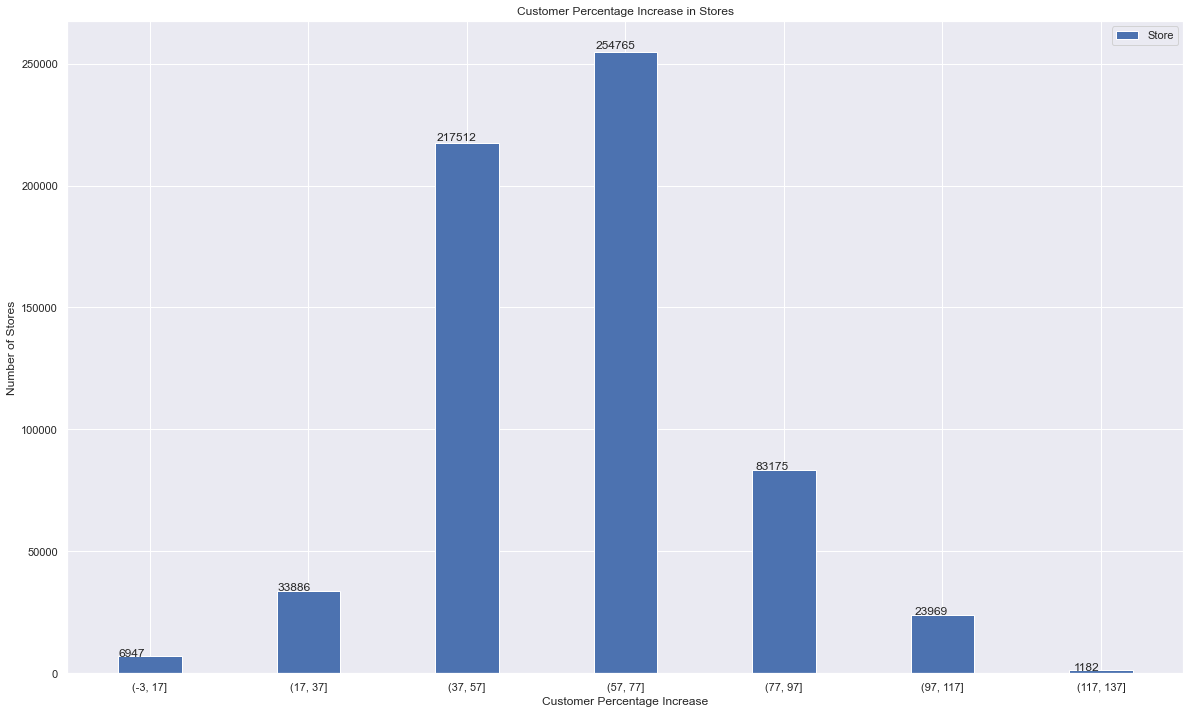

<Figure size 432x288 with 0 Axes>

In [86]:
X_axis = np.arange(len(perc_increase_plot_data.index))
plt.figure(figsize=(20, 12))
plt1 = plt.bar(X_axis, perc_increase_plot_data['Store'], 0.4, label='Store')
for p in plt1.patches:
    plt.annotate('{}'.format(p.get_height()), (p.get_x()
                                                   * 1.005, p.get_height() * 1.005))
plt.xticks(X_axis, perc_increase_plot_data.index)
plt.xlabel("Customer Percentage Increase")
plt.ylabel("Number of Stores")
plt.title("Customer Percentage Increase in Stores")
plt.legend()
plt.show()

plt.savefig('../data/cust_perc_increase_diag.png')

In [89]:
Top10 = customer_info.sort_values(
    by='Customer Percentage Increase', ascending=False)[:10]
res.add_data('top10promocust', Top10)
Top10

,Customers,Customer Percentage Increase
Store,,
198,280,149
607,343,131
575,405,119
271,655,117
635,494,115
1108,488,115
898,590,115
96,449,113
963,840,111


### f) Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

#### Based on StoreType 

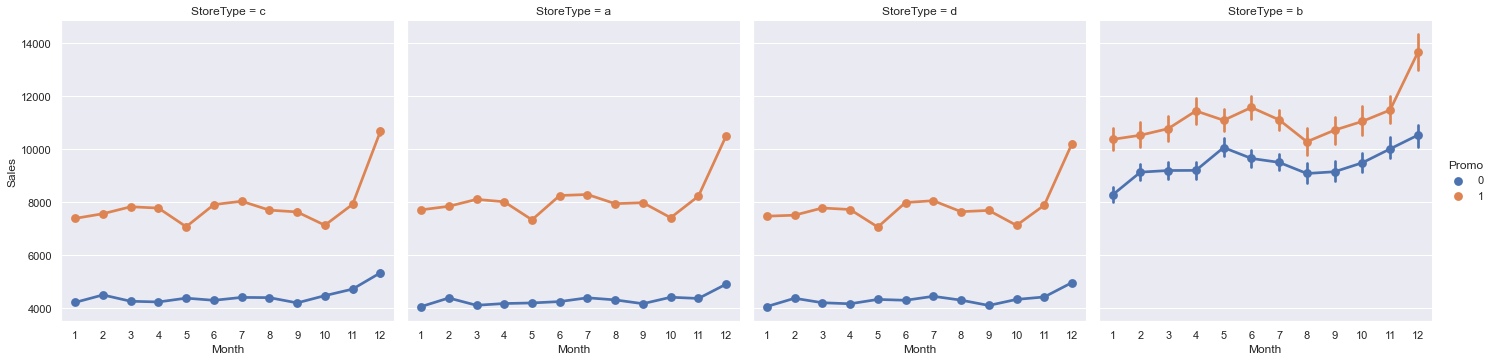

In [91]:
sns.factorplot(data = combined_df, x ="Month", y = "Sales", 
               col = 'StoreType',
               hue = 'Promo')

In [92]:
plt.savefig('../data/Storettype.png')

<Figure size 432x288 with 0 Axes>

#### Based on Assortment type

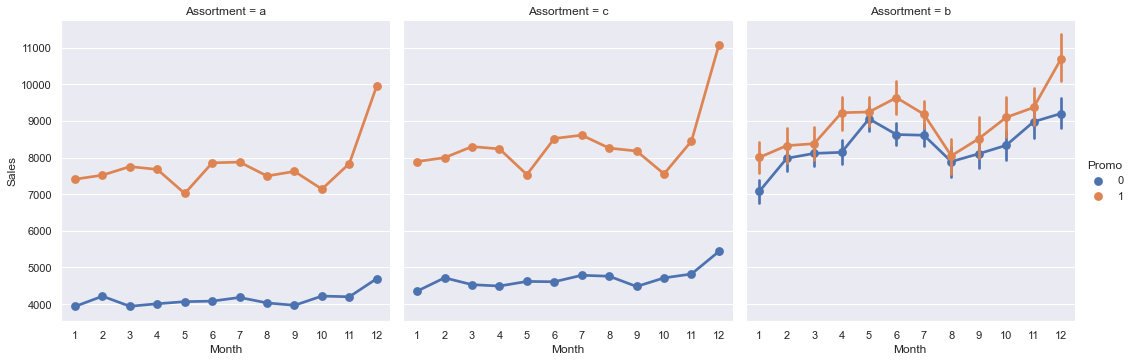

In [94]:
sns.catplot(data=combined_df, x="Month", y="Sales", col='Assortment', hue='Promo', kind='point')

plt.savefig('../data/assortmenttype.png')

#### checking percentage increase

In [95]:
def get_increase_per_store(grouped_cutomer_list: list, profitable_promo:float=10) -> list:
    store_index = []
    i = 0
    while(i < len(grouped_cutomer_list)):
        new_perc = ((grouped_cutomer_list[i+1] * 100) / grouped_cutomer_list[i]) - 100
        if(new_perc >= profitable_promo):
            store_index.append(int(i/2))
        i += 2

    return store_index

In [102]:
#10% increase

customers = train_df.loc[:, ['Store', 'Customers']]
customers = customers.groupby('Store').agg({'Customers': 'mean'})
store_index = get_increase_per_store(customer_value, profitable_promo=10)
store_10_perc_inc = customers[customers.index.isin(store_index)]
res.add_data('10percincrease', store_10_perc_inc)
store_10_perc_inc

,Customers
Store,
1,467.646497
2,486.045648
3,620.286624
4,1100.057325
5,444.360934
...,...
1110,449.000000
1111,373.548832
1112,693.498938


In [104]:

store_index = get_increase_per_store(customer_value, profitable_promo=60)
store_60_perc_inc = customers[customers.index.isin(store_index)]
res.add_data('60percincrease', store_50_perc_inc)
store_60_perc_inc

,Customers
Store,
1,467.646497
2,486.045648
4,1100.057325
5,444.360934
6,525.990446
...,...
1107,549.465699
1108,488.755839
1109,371.179420


In [106]:
store_index = get_increase_per_store(customer_value, profitable_promo=100)
store_100_perc_inc = customers[customers.index.isin(store_index)]
res.add_data('90percincrease', store_100_perc_inc)
store_100_perc_inc

,Customers
Store,
16,703.158174
87,613.756900
95,698.621019
155,542.707124
197,701.006369
270,1002.943737
285,389.868365
321,484.779193
323,513.662420


### g) Trends of customer behavior during store open and closing times

In [107]:
customer_behaviour = train_df.groupby('Open').agg({'Customers':'mean','Sales':'mean'})
customer_behaviour

,Customers,Sales
Open,,
0,0.000000,0.000000
1,762.728395,6955.514291


<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

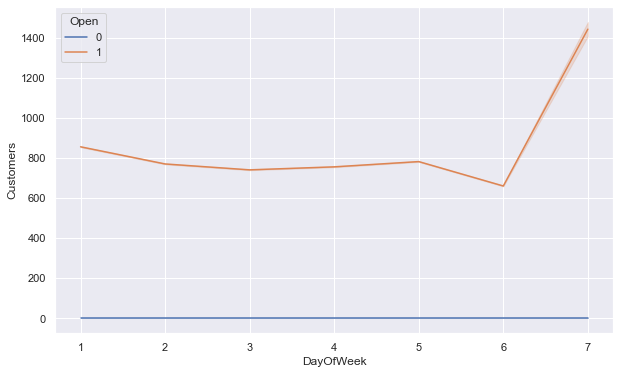

In [109]:
#Interms of days of the week

f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x="DayOfWeek",y="Customers",hue="Open",data=combined_df)

In [110]:
plt.savefig('../data/dayofweeksales.png')

<Figure size 432x288 with 0 Axes>

### h) Which stores are opened on all weekdays? How does that affect their sales on weekends? 

In [55]:
#stores opened on weekdays
All_Weekday=combined_df[combined_df['DayOfWeek']==5]
All_Weekday.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0


In [61]:
All_Weekday.groupby('Store').agg({'Sales':'mean'}).sort_values(by='Sales',ascending=False).head()


,Sales
Store,
262,21236.400000
817,20643.874074
1114,19969.533333
842,19218.559633
562,18719.066667


<AxesSubplot:xlabel='Store'>

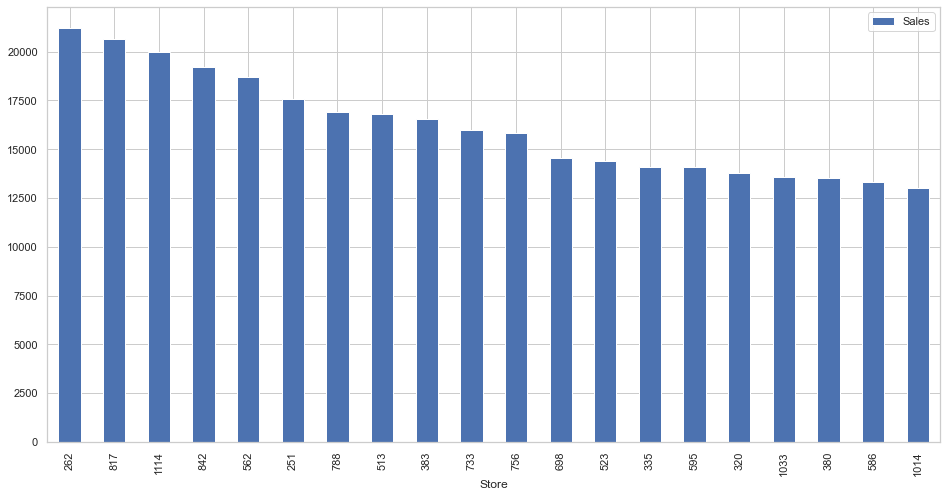

In [64]:
fig,ax=plt.subplots(figsize=(16,8))
All_Weekday.groupby('Store').agg({'Sales':'mean'}).sort_values(by='Sales',ascending=False).head(20).plot(kind='bar',legend=True, ax=ax)

In [32]:
# working weekdays i.e. (monday- friday)  without  public holidatys 
#since they are not included in the working days
holiday_out_df = train_df[train_df['StateHoliday'] == 0]
weekdays_df = holiday_out_df[holiday_out_df['DayOfWeek'] <= 5] #mon-fry

#lists stores who are not open in working in all weekdays
not_open_stores = weekdays_df[weekdays_df['Open'] == 0]   
not_open_stores_id = not_open_stores['Store']
not_open_stores_id = not_open_stores_id.values.tolist()

In [34]:
#for stores open on all weekdays
all_weekdays_open_stores = train_df[~train_df['Store'].isin(not_open_stores_id)]

#for stores not open for al workdays
not_all_weekdays_open_stores = train_df[train_df['Store'].isin(not_open_stores_id)]

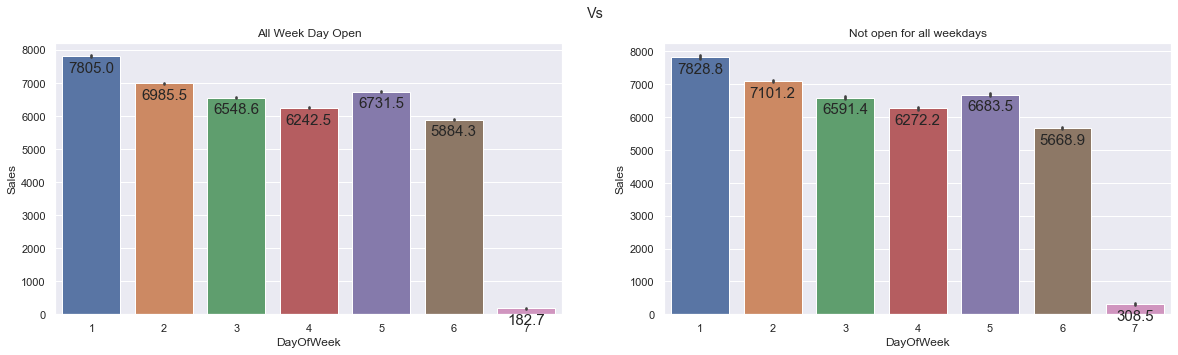

In [36]:
#plotting the two types of stores across eachother

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle(f'Vs')
sns.set_theme(style="whitegrid")

#All weekday plot
plot1 = sns.barplot(
    x='DayOfWeek', y='Sales', data=all_weekdays_open_stores, ax=axs[0])
plot1.set_title('All Week Day Open')
for p in plot1.patches:
    plot1.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=15,
                   xytext=(0, -12),
                   textcoords='offset points')
    
#not all weekday plot
plot2 = sns.barplot(
    x='DayOfWeek', y='Sales', data=not_all_weekdays_open_stores, ax=axs[1])
plot2.set_title('Not open for all weekdays')
for p in plot2.patches:
    plot2.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=15,
                   xytext=(0, -12),
                   textcoords='offset points')

In [65]:
plt.savefig('../data/all_day_comp.png')

<Figure size 432x288 with 0 Axes>

### i) Check how the assortment type affects sales

#### Assortment Vs Sales



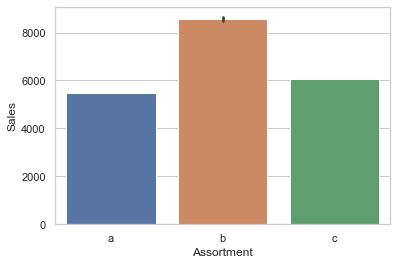

In [68]:
sns.barplot(x='Assortment', y='Sales', data=combined_df, order=['a','b','c'])
plt.show()

In [71]:
plt.savefig('../data/Assortment_sales.png')

<Figure size 432x288 with 0 Axes>

#### Assortment Vs customers count

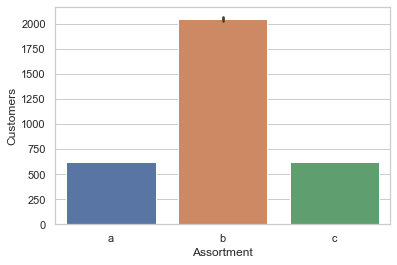

In [70]:
sns.barplot(x='Assortment', y='Customers', data=combined_df, order=['a','b','c'])
plt.show()

In [72]:
plt.savefig('../data/Assortment_cust.png')

<Figure size 432x288 with 0 Axes>

### j) How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?